# Glass Identification Dataset

# Problem Statement:

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("glass.csv")
df

,RI,Na,M,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.head()

,RI,Na,M,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0     RI    214 non-null    float64
 1   Na      214 non-null    float64
 2   M       214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [6]:
df.describe()

,RI,Na,M,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'  RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'M'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

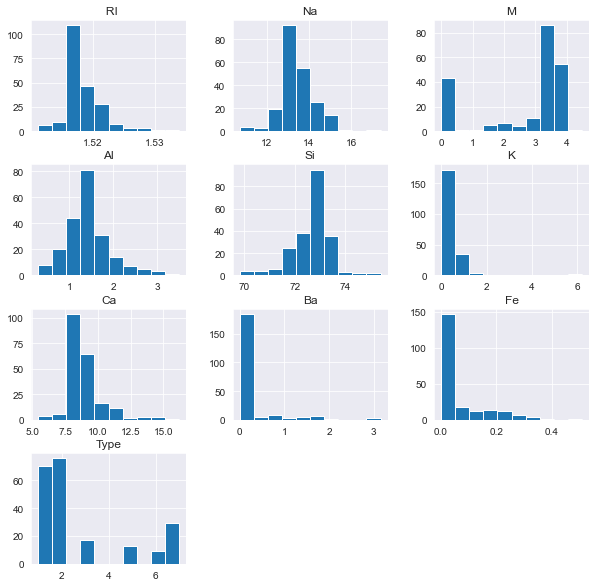

In [7]:
df.hist(figsize= (10,10))  # Understanding where most of the values line up 

Looking at the histograms, we clearly see none of these exhibit a standard normal distribution. K and Ba are the elements that are the most off.

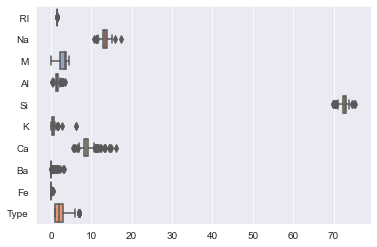

In [8]:
boxplot = sns.boxplot(data=df, orient="h", palette="Set2")

It seems most of the values for the materials are consistent, however NA(Sodium has a lot of outliers). Silicon is also very much high in terms of amount but also straying away from the rest of the materials and values. Sodium might be a high amount in Glass?

In [9]:
corr = df.corr()
corr

,RI,Na,M,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
M,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


C:\Users\Win\AppData\Local\Temp\ipykernel_8376\2639187000.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

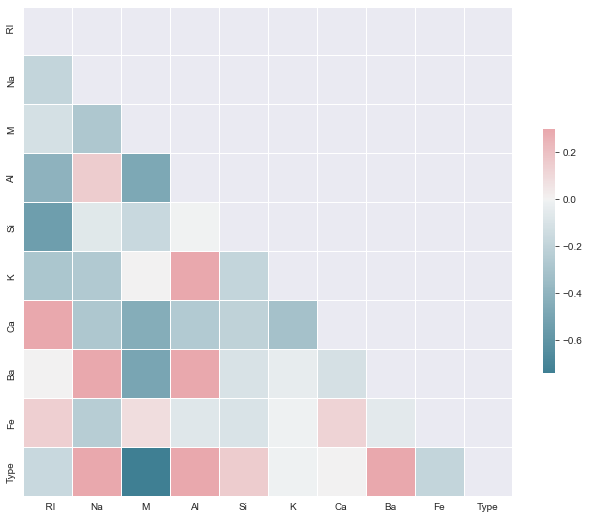

In [10]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Looking at the correlation we see that the elements that are the most correlated with the type of the glass are from lowest to highest, Na(Positive), Al(Positive), and Mg(Negative) These 3 all also had data points with a right skew in the histogram. Something else to note Ca has a high correlation with the reserved index

E:\Anaconda updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Fe'>

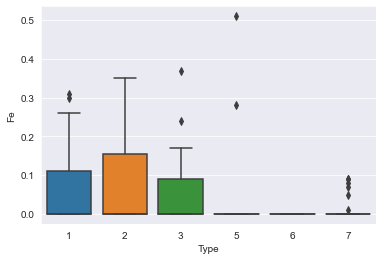

In [11]:
sns.boxplot('Type', 'Fe', data=df)
# Iron mainly present in types 1-3 and outliers in type 7

<AxesSubplot:xlabel='Fe'>

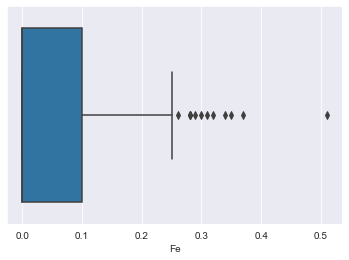

In [12]:
import seaborn as sns
sns.boxplot(x=df['Fe'])

E:\Anaconda updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='M'>

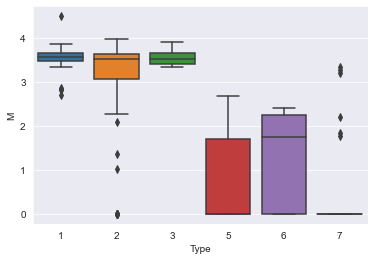

In [13]:
sns.boxplot('Type', 'M', data=df)  # Outliers in glass type 2 and 7

E:\Anaconda updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Na'>

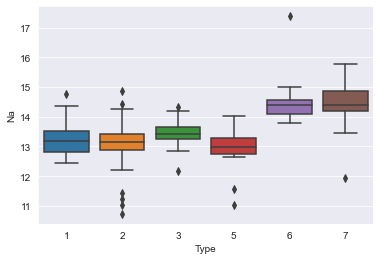

In [14]:
sns.boxplot('Type', 'Na', data=df)  # Main outliers are present in glass type 2

E:\Anaconda updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Al'>

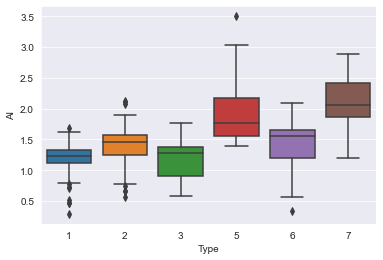

In [15]:
sns.boxplot('Type', 'Al', data=df)  # Outliers present in types 1 and 2

E:\Anaconda updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Ba'>

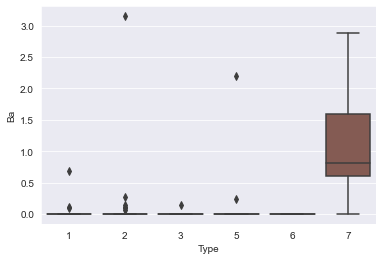

In [16]:
sns.boxplot('Type', 'Ba', data=df)  # Very few outliers but it seems Barium only exists in glass type 7

E:\Anaconda updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Ca'>

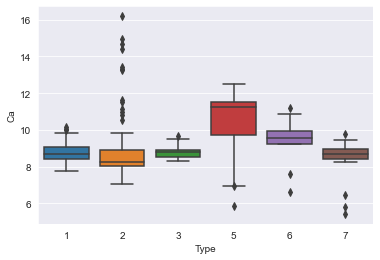

In [17]:
sns.boxplot('Type', 'Ca', data=df)  # Outliers present for glass types 2 and 7

E:\Anaconda updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='K'>

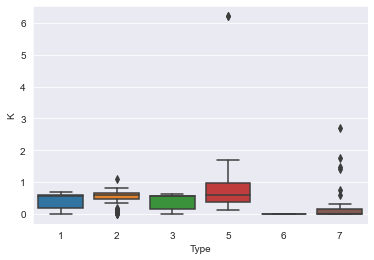

In [18]:
sns.boxplot('Type', 'K', data=df)  # Outliers mainly present for glass type 7

E:\Anaconda updated\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Si'>

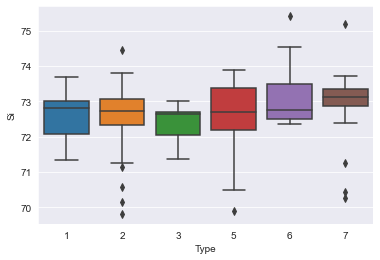

In [19]:
sns.boxplot('Type', 'Si', data=df)  # Outliers present when predicting glass types 2 and 7

Given that type 2 had the highest number of outliers, it is not surprising because type 2 was also where most of the observations came from. Because of this, the next goal is to remove the outliers we have observed. As it stands removing outliers for Na and Al.

[]

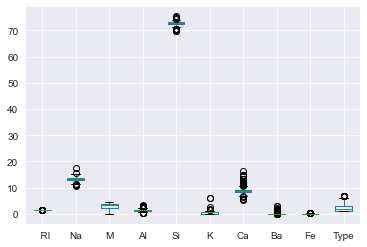

In [20]:
df.boxplot(return_type='dict')
plt.plot()

# Model Selection (Random Forest)

In [21]:
df.target = df['Type']

C:\Users\Win\AppData\Local\Temp\ipykernel_8376\250109832.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = df['Type']


In [22]:
from sklearn.model_selection import train_test_split  # Importing library for split
xTrain, xTest, yTrain, yTest = train_test_split(df.drop(['Type'], axis=1), 
df.target, random_state=0, test_size=0.25)

In [23]:
from sklearn.ensemble import RandomForestClassifier
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)
# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xTrain, yTrain)

RandomForestClassifier()

In [24]:

y_pred = clf.predict(xTest)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, y_pred))

Accuracy: 0.7037037037037037


In [26]:
feature_importances = pd.DataFrame(clf.feature_importances_, 
                    index = xTrain.columns,
                    columns=['importance']).sort_values('importance',ascending=False)

In [27]:
feature_importances

,importance
M,0.169324
Al,0.163155
Ca,0.143409
RI,0.143311
Ba,0.099762
Na,0.093598
K,0.083739
Si,0.078456
Fe,0.025246


Looking at feature importance, we see that Aluminum is the highest and contributes the most to the Random Forest Model, next being Magnesium. This makes sense as these were 2 of the 3 highly correlated values when looking at type that we observed earlier. NA which was the third is 5th on this list meaning it does not contribute as much to the random forest model as we thought. We do know that there is a healthy sense of bias in using feature importance, it might be that Al had the most number of complete observations?

This also hints that removing outliers especially from Al and Na should contribute to a positive effect on the model.

# Tuning the Model

# Outlier Removal

In [28]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

           RI        Na         M        Al        Si         K        Ca  \
1    0.872868  0.284953  1.254639  0.692442  1.127082  0.671705  0.145766   
2    0.249333  0.591817  0.636168  0.170460  0.102319  0.026213  0.793734   
3    0.721318  0.149933  0.601422  0.190912  0.438787  0.164533  0.828949   
4    0.232831  0.242853  0.698710  0.310994  0.052974  0.112107  0.519052   
5    0.312045  0.169205  0.650066  0.411375  0.555256  0.081369  0.624699   
..        ...       ...       ...       ...       ...       ...       ...   
210  0.704815  0.898681  1.865511  2.881125  0.052974  0.640968  0.157088   
211  0.500178  1.856097  1.865511  1.094342  0.529374  0.763919  0.392276   
212  0.754046  1.168721  1.865511  1.154570  0.995252  0.763919  0.364103   
213  0.612399  1.193270  1.865511  0.993960  1.241133  0.763919  0.335931   
214  0.414363  1.009152  1.865511  1.275028  0.917606  0.763919  0.237327   

           Ba        Fe      Type  
1    0.352877  0.586451  0.848275  
2  

In [29]:
threshold = 3
print(np.where(z > 3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [30]:
dfout = df[(z < 3).all(axis=1)]

In [31]:
dfout.shape

(194, 10)

In [32]:

df.shape

(214, 10)

In [33]:
dfout.target = dfout['Type'] 

C:\Users\Win\AppData\Local\Temp\ipykernel_8376\2098214328.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfout.target = dfout['Type']


# Re-Training after Ouliers have been removed

In [34]:
from sklearn.model_selection import train_test_split  # Importing library for split
xTrainnoout, xTestnoout, yTrainnoout, yTestnoout = train_test_split(dfout.drop(['Type'], axis=1), 
dfout.target, random_state=0, test_size=0.25)

In [35]:
clf.fit(xTrainnoout,yTrainnoout)

RandomForestClassifier()

In [36]:

y_prednoout = clf.predict(xTestnoout)

In [37]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(yTestnoout, y_prednoout))

Accuracy: 0.8367346938775511


In [38]:
clf.fit(xTrainnoout,yTrainnoout).score(xTrainnoout, yTrainnoout)

1.0

In [39]:
# Getting the importance of features when factoring them into the model
feature_importances = pd.DataFrame(clf.feature_importances_,
                            index = xTrainnoout.columns,
                            columns=['importance']).sort_values('importance', ascending=False)

In [40]:

feature_importances

,importance
M,0.163868
Al,0.156233
Ca,0.153977
RI,0.152155
K,0.097370
Si,0.086346
Na,0.079916
Ba,0.077592
Fe,0.032544


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, y_pred)
print(confusion_matrix)

[[11  3  0  0  0  0]
 [ 7 15  1  0  0  1]
 [ 2  2  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


Next we will use Grid Search CV to sample from the best values provided by the random forest process. This will help to see if we can improve the accuracy further.

# Hyper Parameter Tuning with Grid Search CV

In [42]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

In [50]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=Warning)

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
CV_rfc.fit(xTrainnoout, yTrainnoout)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [45]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [46]:
rfc1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, max_depth=8, criterion='gini')

In [47]:
rfc1.fit(xTrainnoout, yTrainnoout)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [48]:
pred = rfc1.predict(xTestnoout)
print("Accuracy for Random Forest on CV data: ", metrics.accuracy_score(yTestnoout, pred))

Accuracy for Random Forest on CV data:  0.8367346938775511


In [49]:
rfc1.fit(xTrainnoout, yTrainnoout).score(xTrainnoout, yTrainnoout)

0.9862068965517241

The GridSearch CV has increased the Random Forest by 2% thus improving the accuracy of the prediction. It does this by finding the best number of forests (number of trees) and splits the data across it to achieve a prediction. I can't achieve above this accuracy, as I lead into overfitting. This will be the final model.